# H&M Recommender system - Capstone Part 1

## Problem statement

The challenge was an active Kaggle competition which I participated in which was hosted and ran from February 7 2022 till May 9 2022 by H&M Group. 

[*link*](https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/overview/description)

For this challenge I was given the purchase history of customers across time, along with supporting metadata. The challenge is to predict what articles each customer will purchase in the 7-day period immediately after the training data ends. Customer who did not make any purchase during that time are excluded from the scoring.

Scoring method used in the competition is Mean Average Precision @ 12 (MAP@12) and since there is never a penalty for using the full 12 predictions for a customer that ordered fewer than 12 items; thus, it's advantageous to make 12 predictions for each customer.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read all csv
articles = pd.read_csv('../datasets/articles.csv', dtype={'article_id': 'str'})
customers = pd.read_csv('../datasets/customers.csv')
sample = pd.read_csv('../datasets/sample_submission.csv')
train = pd.read_csv('../datasets/transactions_train.csv', dtype={'article_id': 'str'})

## Articles dataset

The articles dataset contains the specifics of all products sold in H&M.

In [3]:
articles.dtypes

article_id                      object
product_code                     int64
prod_name                       object
product_type_no                  int64
product_type_name               object
product_group_name              object
graphical_appearance_no          int64
graphical_appearance_name       object
colour_group_code                int64
colour_group_name               object
perceived_colour_value_id        int64
perceived_colour_value_name     object
perceived_colour_master_id       int64
perceived_colour_master_name    object
department_no                    int64
department_name                 object
index_code                      object
index_name                      object
index_group_no                   int64
index_group_name                object
section_no                       int64
section_name                    object
garment_group_no                 int64
garment_group_name              object
detail_desc                     object
dtype: object

| Item     | Description |
| ----------- | ----------- |
|article_id      | The assigned article ID. The ID will be unique for each identifiable article.|
|product_code  |A subcategory code for the group of products. |
|prod_name| A subcategory name for the group of products. |
|product_type_no|A subcategory code for type of product.|
|product_type_name|A subcategory name for type of product.|
|product_group_name|A subcategory name for group of product. ie. Underwear, Upper garment etc.|
|graphical_appearance_no|A subcategory code for type of pattern product belongs to. Eg. Solid or Stripes etc and its corresponding number|
|graphical_appearance_name  |A subcategory name for type of pattern product belongs to. Eg. Solid or Stripes etc.|
|colour_group_code  |A subcategory code for type of color group which product belongs to. Eg. Black or white and its corresponding number.|
|colour_group_name  |A subcategory name for type of color group which product belongs to. Eg. Black or white.|
|perceived_colour_value_id |A subcategory code for type of perceieved color group which product belongs to. Eg. Dark, light in numerical form.|
|perceived_colour_value_name  |A subcategory name for type of perceieved color group which product belongs to. Eg. Dark, light.|
|perceived_colour_master_id   |A subcategory code for type of perceived color group which product belongs to. Eg. Black, white in numerical form.|
|perceived_colour_master_name    |A subcategory name for type of perceived color group which product belongs to. Eg. Black, white.|
|department_no    |A subcategory code for department which product belongs to. Eg. Jersey, lingerie etc|
|department_name    |A subcategory name for department which product belongs to. Eg. Jersey, lingerie etc.|
|index_code     |A subcategory code for index that product belongs to. Eg. Ladieswear, Lingeries, Menswear etc.|
|index_name     |A subcategory name for index that product belongs to. Eg. Ladieswear, Lingeries, Menswear etc.|
|index_group_no     |A greater subcategory code for index that product belongs to. Eg. Ladieswear, Menswear etc.|
|index_group_name    |A greater subcategory name for index that product belongs to. Eg. Ladieswear, Menswear etc.|
|section_no       |A subcategory code for section that product belongs to. Eg. Women's Everyday Basics, Men Underwear etc.|
|section_name     |A subcategory name for section that product belongs to. Eg. Women's Everyday Basics, Men Underwear etc.|
|garment_group_no    |A subcategory code for garment group that product belongs to. Eg. Jersey Basic, Jersey Fancy etc.|
|garment_group_name   |A subcategory name for garment group that product belongs to. Eg. Jersey Basic, Jersey Fancy etc.|
|detail_desc    |General description of the product and its features.|

In [4]:
articles.describe()

,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no
count,105542.000000,105542.000000,1.055420e+05,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000
mean,698424.563378,234.861875,1.009515e+06,32.233822,3.206183,7.807972,4532.777833,3.171534,42.664219,1010.438290
std,128462.384432,75.049308,2.241359e+04,28.086154,1.563839,5.376727,2712.692011,4.353234,23.260105,6.731023
min,108775.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1201.000000,1.000000,2.000000,1001.000000
25%,616992.500000,252.000000,1.010008e+06,9.000000,2.000000,4.000000,1676.000000,1.000000,20.000000,1005.000000
50%,702213.000000,259.000000,1.010016e+06,14.000000,4.000000,5.000000,4222.000000,2.000000,46.000000,1009.000000
75%,796703.000000,272.000000,1.010016e+06,52.000000,4.000000,11.000000,7389.000000,4.000000,61.000000,1017.000000
max,959461.000000,762.000000,1.010029e+06,93.000000,7.000000,20.000000,9989.000000,26.000000,97.000000,1025.000000


Noted that H&M is a clothing retailer, and it is within expectations to have lots of products in their inventory.

The complication that arises is that this which translates into many rows of data in the `articles` dataset. In particular, there are a total of 105,542 rows, which ties in with the 105,542 unique values of `article_id`. Also noted that there are many features that can be used to distinguish between each product.

### Check for null values

In [40]:
articles['garment_group_name']

0              Jersey Basic
1              Jersey Basic
2              Jersey Basic
3         Under-, Nightwear
4         Under-, Nightwear
                ...        
105537     Socks and Tights
105538         Jersey Fancy
105539         Jersey Fancy
105540          Accessories
105541         Jersey Fancy
Name: garment_group_name, Length: 105542, dtype: object

In [5]:
articles.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

Other than `detail_desc` there are no other null values found in the dataset.

In [6]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,0108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,0110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,0110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [7]:
articles[articles['detail_desc'].notnull()].head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,0108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,0110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,0110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


#### Treatment of null values

Upon perusal and comparing to the entries with `detail_desc` filled up, I personally am of the opinion that there is plenty of other information from `prod_name`, `product_type_name`, `product_group_name` and `garment_group_name` which give enough description of what the item is. `detail_desc` merely gives even more nuanced details. 

As such, I will drop the column since it is repeated information.

In [8]:
articles.drop(columns='detail_desc', inplace=True)

In [9]:
articles['article_id'].nunique()

105542

In [29]:
str(round((12/105542*100),4))+'%'

'0.0114%'

In picking the top 12 items that are the most probable, I am picking 0.0114% of the population from the total number of articles. This makes it a very challenging task and very low odds to guess correctly if a non systematic elimination method is not derived.

In [9]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,0108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,0110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,0110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


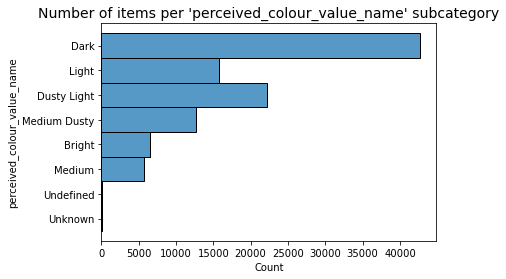

In [51]:
# Plot histplot to understand popular products in 'perceived_colour_value_name' subcategory
sns.histplot(articles, y='perceived_colour_value_name')
plt.title('Number of items per \'perceived_colour_value_name\' subcategory', fontsize=14);

The most common color scheme is dark.

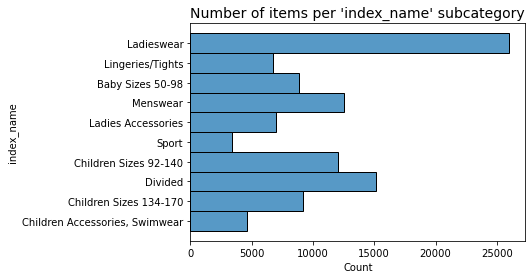

In [3]:
# Plot histplot to understand popular products in 'index_name' subcategory
sns.histplot(articles, y='index_name')
plt.title('Number of items per \'index_name\' subcategory', fontsize=14);

`Ladieswear` is the subcategory which has the most variety of products, followed by `Divided` and then `Menswear`. As such, we can see that H&M customers are heavily skewed towards the female gender.

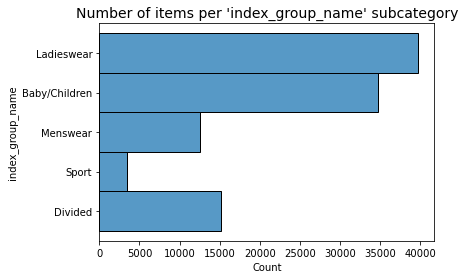

In [41]:
# Plot histplot to understand popular products in 'index_group_name' subcategory
sns.histplot(articles, y='index_group_name')
plt.title('Number of items per \'index_group_name\' subcategory', fontsize=14);

We see the same skewed numbers towards ladies products. Given that there is different types of products, I will try to build a model that groups the customers by their features. This idea will be further explored as we understand the `Customers` dataset at a deeper level.

It was noted that `prod_name`, `prod_type_name`, `department_name`, `section_name` had too many categories, as such, it was difficult to visualise them in charts. In a rule base model, such variations would be difficult to capture. However, if fed to a machine learning model, such granularity can help models to predict better since it means more features to work with.

## Customers dataset

Customers dataset is a masked database containing member information.

In [7]:
customers.dtypes

customer_id                object
FN                        float64
Active                    float64
club_member_status         object
fashion_news_frequency     object
age                       float64
postal_code                object
dtype: object

#### Data dictionary for `customers` dataset

| Item     | Description |
| ----------- | ----------- |
| customer_id      | The assigned customer ID. The ID will be unique for each identified customer.|
| FN   |Whether the customer receives a fashion newsletter from H&M. 1 for receiving, NaN for not receiving. Explained in https://www.kaggle.com/c/h-and-m-personalized-fashion-recommendations/discussion/305952#1684481  |
|Active| Whether customer is active for communications. 1 for active, NaN for not active. Explained in https://www.kaggle.com/c/h-and-m-personalized-fashion-recommendations/discussion/305952#1684481|
|club_member_status|Current status of customer in membership.|
|fashion_news_frequency| Frequency of receiving fashion newsletter.|
|age|Age of customer.|
|postal_code|Unique postal code which has been masked for purpose of competition.|



In [16]:
customers.describe()

,FN,Active,age
count,476930.0,464404.0,1.356119e+06
mean,1.0,1.0,3.638696e+01
std,0.0,0.0,1.431363e+01
min,1.0,1.0,1.600000e+01
25%,1.0,1.0,2.400000e+01
50%,1.0,1.0,3.200000e+01
75%,1.0,1.0,4.900000e+01
max,1.0,1.0,9.900000e+01


In [15]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [37]:
customers['fashion_news_frequency'].value_counts()

NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64

Most of the customers have chosen to not get fashion news, and thus having `NONE` as most frequent value.

In [ ]:
customers[customers['FN'].isnull()]

In [ ]:
customers[customers['Active'].isnull()]

#### Treatment for null values

In [17]:
customers.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

Several columns of the `customers` dataset contains null values. In particular, FN and Active contains the most and on further understanding, null value can be inferred to be the negative class for these 2 columns, as only value of '1' is present.

In [17]:
# Impute NaN values by deductive imputation and understanding from data dictionary
customers['FN'].fillna(0, inplace=True)
customers['Active'].fillna(0, inplace=True)
customers['club_member_status'].fillna('UNKNOWN', inplace=True)
customers['fashion_news_frequency'].fillna('NONE', inplace=True)
customers['age'].fillna(customers['age'].mean(), inplace=True)

In [29]:
customers['customer_id'].nunique()

1371980

There is 1,371,980 customers ID data in total. However, there are plenty of null values for FN and Active columns.

#### EDA for `customers` dataset

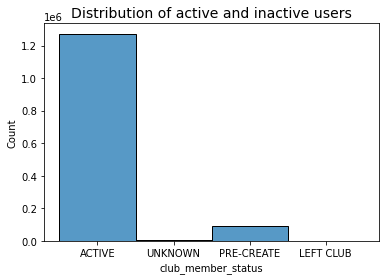

In [14]:
# Plot histplot to understand distribution of active
sns.histplot(customers,x='club_member_status')
plt.title('Distribution of active and inactive users', fontsize=14);

Most customers in the database are considered as `Active` customers. This seems to be very loosely kept by H&M, and might not be a datapoint of high integrity, since most are within the `Active` category.

In [6]:
customers['fashion_news_frequency'].value_counts()

NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64

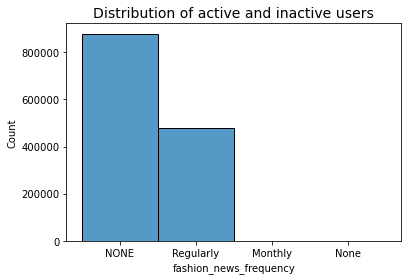

In [4]:
# Plot histplot to understand distribution of fashion_news_frequency
sns.histplot(customers,x='fashion_news_frequency')
plt.title('Distribution of active and inactive users', fontsize=14);

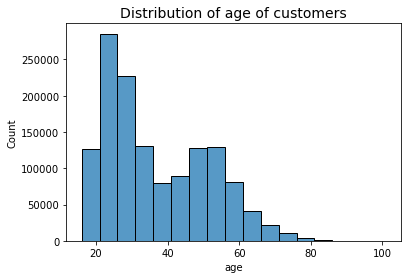

In [44]:
sns.histplot(customers,x='age', binwidth=5)
plt.title('Distribution of age of customers', fontsize=14);

Most common age of customers is around 21 to 25. The customers are seen to have a wide age group, showing that H&M is a store for all ages.

## Train dataset

In [3]:
train.dtypes

t_dat                object
customer_id          object
article_id           object
price               float64
sales_channel_id      int64
dtype: object

In [4]:
train.describe()

,price,sales_channel_id
count,3.178832e+07,3.178832e+07
mean,2.782927e-02,1.704028e+00
std,1.918113e-02,4.564786e-01
min,1.694915e-05,1.000000e+00
25%,1.581356e-02,1.000000e+00
50%,2.540678e-02,2.000000e+00
75%,3.388136e-02,2.000000e+00
max,5.915254e-01,2.000000e+00


In [5]:
train['customer_id'].nunique()

1362281

Compared with 1,371,980 unique customer IDs it shows that not all customers purchased anything in the 2 year period that we have in `train` dataset. I will assume that 9,699 (around 0.7%) are new customers who bought something in the 7 days period which we are trying to predict. 

In [8]:
train.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

There are no null values to be concerned with for the dataset.

In [19]:
# Change date to datetime format, and create month and year column
train['t_dat']=pd.to_datetime(train['t_dat'])
train['month']=train['t_dat'].dt.month
train['year']=train['t_dat'].dt.year


H&M belongs to fast fashion, where there are products that are seasonal. As we are predicting what are items that will be bought in the next seven days in September, I will want to focus on specific months of the season instead of every month.

In [16]:
train['t_dat'].min()

Timestamp('2018-09-20 00:00:00')

In [17]:
train['t_dat'].max()

Timestamp('2020-09-22 00:00:00')

In [20]:
train.head()

,t_dat,customer_id,article_id,price,sales_channel_id,month,year
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.050831,2,9,2018
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.030492,2,9,2018
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.015237,2,9,2018
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687003,0.016932,2,9,2018
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687004,0.016932,2,9,2018


In [14]:
train.tail()

,t_dat,customer_id,article_id,price,sales_channel_id,month
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0929511001,0.059305,2,9
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0891322004,0.042356,2,9
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,0918325001,0.043203,1,9
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,0833459002,0.006763,1,9
31788323,2020-09-22,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,0898573003,0.033881,2,9


In [10]:
# Top 20 customers
train_byid = train.groupby('customer_id').count()
train_byid.sort_values('t_dat',ascending=False)[:20]

,t_dat,article_id,price,sales_channel_id
customer_id,,,,
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b,1895,1895,1895,1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71,1441,1441,1441,1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f,1364,1364,1364,1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc,1361,1361,1361,1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6,1237,1237,1237,1237
55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d,1208,1208,1208,1208
c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa,1170,1170,1170,1170
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076,1169,1169,1169,1169
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296,1157,1157,1157,1157


There are some really die hard fans of the H&M brand who has bought alot of items.

In [11]:
train_byid[train_byid['article_id']<12]

,t_dat,article_id,price,sales_channel_id
customer_id,,,,
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,2,2,2,2
000064249685c11552da43ef22a5030f35a147f723d5b02ddd9fd22452b1f5a6,3,3,3,3
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a,6,6,6,6
00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77334eaec4ffccd7ebcc,2,2,2,2
00008469a21b50b3d147c97135e25b4201a8c58997f78782a0cc706645e14493,4,4,4,4
...,...,...,...,...
ffff8f9ecdce722b5bab97fff68a6d1866492209bfe5242c50d2a10a652fb5ef,9,9,9,9
ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae5bdfa4cf4b5874c806,3,3,3,3
ffffaff3905b803d1c7e153a1378a5151e1f34f236ba5451afc7cf3f699c5690,1,1,1,1


In [24]:
# check proportion of cold start customers
str(round(((750836+9699)/1371980*100),2))+'%'

'55.43%'

55.43% of users made less than 12 purchases in the last 2 years. This shows that indeed cold start is a problem that is very big in this Kaggle competition.

We simply do not have enough data to know what these users have preferences for in terms of the items purchased. In the recommender models that I build, I will need to guess the buying behaviours of these customers well.

In [51]:
#Bottom 20 customers
train_byid.sort_values('t_dat',ascending=True)[:20]

,t_dat,article_id,price,sales_channel_id
customer_id,,,,
ffffd9ac14e89946416d80e791d064701994755c3ab686a1eaf3458c36f52241,1,1,1,1
73f988e71aa96456022c21f0fc62e78bcf7d97b5646b33883b231dd37d88204b,1,1,1,1
73f9a9dd9f5f3249685206fd12ac93b68c206a8c56fbd95eb767fa0dccde0892,1,1,1,1
11fa5af0b08a07eaf538044849db18130d706ca031a01c413af285e5e7b4d35b,1,1,1,1
73f9ca9e633c23ff9da2dbccbc687e092abdd375d4baa087209305378561f082,1,1,1,1
62db93dc8cab39fbe082b685357f12bc486a1d9b4a2c9f1d96b9f15beae25b34,1,1,1,1
835b25520087f43ff560d65a0c0751d5ef3a5059e8e216d274304a9df35d63e9,1,1,1,1
1eed2c3a97c09c95b74ca947b361a73e8309880ac870451d3c2cfdb5909abacf,1,1,1,1
62db5602a5d732134502eefe8212dc7de39f26f414a87350b8d5a4820df2020c,1,1,1,1


For the bottom 20 customers, we see that as long as there is 1 transaction, customers will be recorded into the system as a new customer ID. 

In [23]:
# Mask train dataset into years
train_2018=train[train['year']==2018]
train_2019=train[train['year']==2019]
train_2020=train[train['year']==2020]

In [25]:
train_2018.dtypes

t_dat               datetime64[ns]
customer_id                 object
article_id                  object
price                      float64
sales_channel_id             int64
month                        int64
year                         int64
dtype: object

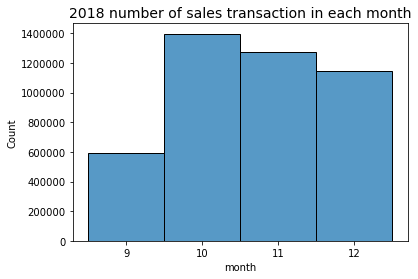

In [36]:
# Plot 2018 transactions per month
plt.ticklabel_format(style='plain')
plt.xticks(np.arange(8, 13))
sns.histplot(train_2018,x='month', discrete=True)
plt.title('2018 number of sales transaction in each month', fontsize=14);

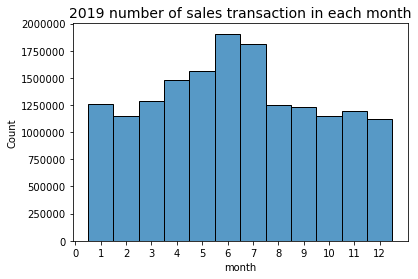

In [37]:
# Plot 2019 transactions per month
plt.ticklabel_format(style='plain')
plt.xticks(np.arange(0, 13))
sns.histplot(train_2019,x='month', discrete=True)
plt.title('2019 number of sales transaction in each month', fontsize=14);

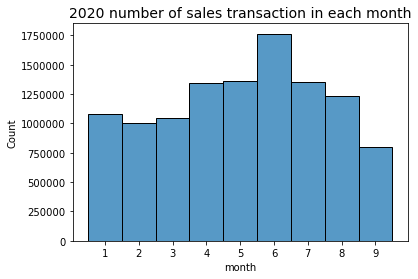

In [38]:
# Plot 2020 transactions per month
plt.ticklabel_format(style='plain')
plt.xticks(np.arange(0, 13))
sns.histplot(train_2020,x='month', discrete=True)
plt.title('2020 number of sales transaction in each month', fontsize=14);

Extracted from the annual report of H&M 2021, it was noted that the seasons for new apparels are different country to country. [*source*](https://hmgroup.com/wp-content/uploads/2022/03/HM-Group-Annual-and-Sustainability-Report-2021.pdf) There does not seem be a publicly available information as to when each season begins and when each ends. 

As the key output is to have predicted items a customer will buy in the next 7-day period after the training time period (22 September 2020), our predicted month will still be in September 2020.

As my best guess, I would expect September to be the start of fall, and clothing should be either fall or summmer collection. Thus I assume that June to November for each year would be the best predictors for the types of clothing that customers would buy in September.

When I did a quick search online, I noted that the fall season clothing for H&M was released in the first week of September. As such, I will be intending to zoom into specifically September 2020 period, since timing would be important. In later notebooks, I would identify that the last 5 weeks seems to be the sweet spot that gives the best scoring.

In [39]:
# merging customer with train should be correct - for active customers
merged = train.merge(customers, how='left', on='customer_id')

In [41]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,0108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,0110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,0110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [42]:
merged = merged.merge(articles, how='left', on='article_id')

In [45]:
merged.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id',
       'month', 'year', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code', 'product_code',
       'prod_name', 'product_type_no', 'product_type_name',
       'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [47]:
merged['product_group_name'].value_counts()

Garment Upper body       12552755
Garment Lower body        7046054
Garment Full body         3552470
Swimwear                  2579222
Underwear                 2565858
Accessories               1599593
Shoes                      745521
Socks & Tights             685712
Nightwear                  348180
Unknown                     97040
Bags                         7313
Items                        5427
Cosmetic                     1500
Underwear/nightwear           559
Furniture                     533
Garment and Shoe care         279
Stationery                    229
Interior textile               74
Fun                             5
Name: product_group_name, dtype: int64

In [51]:
merged['colour_group_name'].value_counts()

Black              11036956
White               3368276
Dark Blue           2180620
Light Beige         1263385
Blue                1088455
Beige                921184
Light Blue           913496
Light Pink           858234
Off White            841673
Grey                 840065
Red                  768645
Greenish Khaki       761391
Dark Red             717390
Dark Grey            717041
Dark Green           713973
Pink                 492176
Yellow               429296
Yellowish Brown      414028
Light Grey           405098
Light Orange         384099
Dark Beige           290696
Dark Orange          276779
Gold                 244046
Dark Pink            191746
Green                187765
Light Yellow         185699
Orange               163804
Light Green          123006
Dark Turquoise       117842
Silver               117335
Dark Yellow          114494
Light Purple         108760
Light Turquoise       72502
Turquoise             72280
Other Pink            71748
Greyish Beige       

It was interesting to see that bulk of the items that are sold are black, white and dark blue in color. This is aligned with what we noticed in the `Articles` dataset EDA.

In [52]:
merged['garment_group_name'].value_counts()

Jersey Fancy                     5171611
Jersey Basic                     3268451
Under-, Nightwear                2966788
Trousers                         2953711
Swimwear                         2538085
Blouses                          2510441
Knitwear                         2392807
Dresses Ladies                   2147529
Accessories                      1645464
Trousers Denim                   1279886
Socks and Tights                  747344
Shorts                            736716
Shoes                             729477
Outdoor                           715576
Skirts                            624822
Dressed                           409535
Unknown                           391639
Special Offers                    232397
Shirts                            210289
Woven/Jersey/Knitted mix Baby      59863
Dresses/Skirts girls               55893
Name: garment_group_name, dtype: int64

Top 3 items that are the most popular are the fancy and basic jersey tops and underwear and nightwear.

## Conclusion from EDA

Based on my understanding of the fast fashion business factors such as recency, trends, customer profiling, age can be key methods to create rule based models. 

I will also attempt to deal with the problem of cold start, by filling them up with general predictions with use of bestsellers and popular items.

There are many features that can also be used to create a machine learning model.

It was also noted that the sheer size of transactions and data is large. Further manipulation of data will be needed, and Google Colab will be used in order to not be limited by my local computer's RAM size. GPU use through RAPIDS and cuDF will also speed up process in these future notebooks.

In [52]:
articles.to_csv('../datasets/articles_cleaned.csv')